In [6]:
import numpy as np

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import pandas as pd
from PyQt5.QtGui.QRawFont import weight

In [7]:
image_as_array = mpimg.imread('../../DATA/palm_trees.jpg')

In [10]:
image_as_array

array([[[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 23,  63,  99],
        [ 51,  91, 127],
        [ 50,  90, 126]],

       [[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 31,  71, 107],
        [ 48,  88, 124],
        [ 47,  90, 125]],

       [[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 39,  79, 115],
        [ 42,  85, 120],
        [ 44,  88, 123]],

       ...,

       [[  4,   4,   6],
        [  4,   4,   6],
        [  4,   4,   6],
        ...,
        [  9,   9,  11],
        [  9,   9,  11],
        [  9,   9,  11]],

       [[  3,   3,   5],
        [  3,   3,   5],
        [  3,   3,   5],
        ...,
        [  8,   8,  10],
        [  8,   8,  10],
        [  8,   8,  10]],

       [[  4,   4,   6],
        [  4,   4,   6],
        [  4,   4,   6],
        ...,
        [  9,   9,  11],
        [ 10,  10,  12],
        [ 10,  10,  12]]

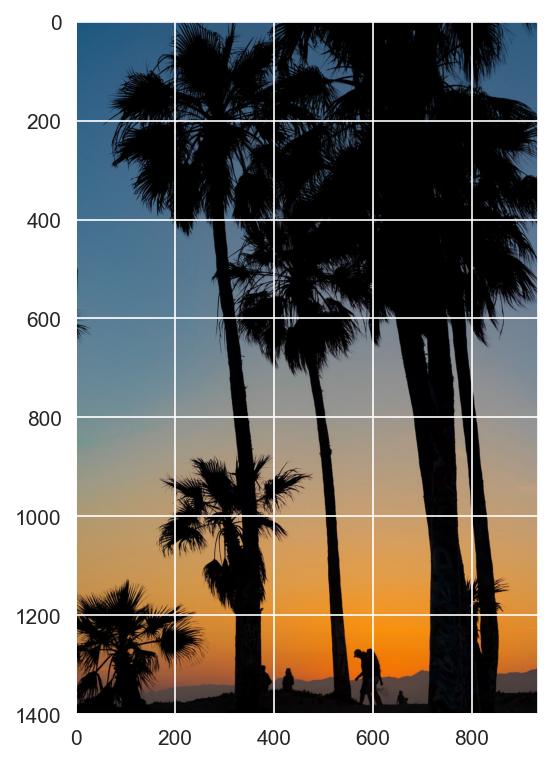

In [12]:
plt.figure(figsize=(6, 6), dpi=150)
plt.imshow(image_as_array)

In [13]:
image_as_array.shape

(1401, 934, 3)

In [14]:
(height, width, channels) = image_as_array.shape

In [21]:
image_as_array2d = image_as_array.reshape(height * width, channels)

In [22]:
image_as_array2d

array([[ 25,  89, 127],
       [ 25,  89, 127],
       [ 25,  89, 127],
       ...,
       [  9,   9,  11],
       [ 10,  10,  12],
       [ 10,  10,  12]], dtype=uint8)

In [23]:
from sklearn.cluster import KMeans

In [25]:
model = KMeans(n_clusters=6)

In [27]:
model

KMeans(n_clusters=6)

In [28]:
labels = model.fit_predict(image_as_array2d)

In [32]:
labels

array([2, 2, 2, ..., 0, 0, 0])

In [34]:
model.cluster_centers_

array([[  2.7592921 ,   2.57685066,   3.70075856],
       [141.28475859, 145.16219581, 142.53819334],
       [ 72.39366171, 110.21760611, 138.19607735],
       [196.21777584, 154.52507365, 104.23543787],
       [ 67.14377769,  61.65603147,  62.2988354 ],
       [219.38819396, 133.41658585,  43.54187036]])

In [35]:
rgb_codes = model.cluster_centers_.round(0).astype(int)

In [37]:
quantized_image = np.reshape(rgb_codes[labels], (height, width, channels))

In [38]:
quantized_image

array([[[ 72, 110, 138],
        [ 72, 110, 138],
        [ 72, 110, 138],
        ...,
        [ 67,  62,  62],
        [ 72, 110, 138],
        [ 72, 110, 138]],

       [[ 72, 110, 138],
        [ 72, 110, 138],
        [ 72, 110, 138],
        ...,
        [ 67,  62,  62],
        [ 72, 110, 138],
        [ 72, 110, 138]],

       [[ 72, 110, 138],
        [ 72, 110, 138],
        [ 72, 110, 138],
        ...,
        [ 72, 110, 138],
        [ 72, 110, 138],
        [ 72, 110, 138]],

       ...,

       [[  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4],
        ...,
        [  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4]],

       [[  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4],
        ...,
        [  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4]],

       [[  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4],
        ...,
        [  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4]]

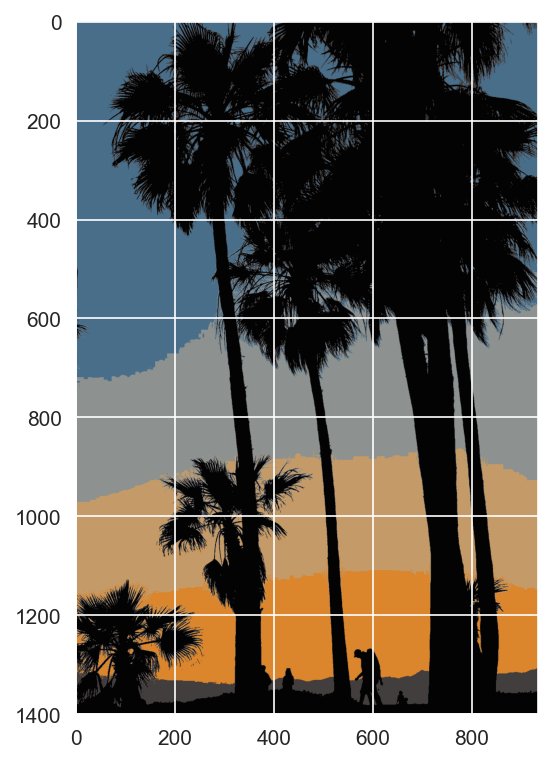

In [39]:
plt.figure(figsize=(6, 6), dpi=150)
plt.imshow(quantized_image)